In [1]:
import numpy as np
import matplotlib.pyplot as plt
import glob

from keckcode_test.keckcode.esiredux import esi2d
from specim_test.specim.specfuncs import spec2d, spec1d, echelle1d
#from specim.specfuncs import spec1d, specset1d

In [ ]:
file_loc = '../galaxy_spectra/ESI_data/*'

In [ ]:
spec2d_file_list = []
var2d_file_list = []
#out_file = []
for i,p in enumerate(glob.glob(file_loc)):
    if 'Feige110' in p:
        if 'bgsub.fits' in p:
            spec2d_file_list.append(p)
        elif 'var.fits' in p:
            var2d_file_list.append(p)
            #frame = p.split('_')[-3][:4]
            #out_file.append('0053m1_r'+ frame + '_cleaned.fits')
        #print(p)

In [ ]:
spec = esi2d.Esi2d(spec2d_file_list[0], varfile=var2d_file_list[1])
print(spec2d_file_list[0])
print(var2d_file_list[1])

In [ ]:
pixrange = [(1900, 2400)]
sp_list = [spec[1], spec[2], spec[5],spec[6], spec[8], spec[9]]
sp_info = [spec.ordinfo[1], spec.ordinfo[2], spec.ordinfo[5], spec.ordinfo[6], spec.ordinfo[8],
          spec.ordinfo[9]]
for sp, info in zip(sp_list, sp_info):
    title = 'Spatial profile for ' + str(info['name'])
    sp.spatial_profile(pixrange=pixrange[0], title=title)
    plt.show()
    sp.initial_model()

In [ ]:
outspec = spec.extract_all(method='cdf', plot_profiles=False, plot_traces=True, plot_extracted=False,
                          stepsize=20)

In [2]:
fg_spec = echelle1d.Ech1d('spec1d_feige110_esi_26.fits')

Opening echelle spectrum file: spec1d_feige110_esi_26.fits

Ord N_pix lam_start lam_end  dispave
--- ----- --------- -------- -------
  0  1500   4071.46  4310.06   0.16
  1  2000   4240.70  4575.32   0.17
  2  2400   4546.04  4979.85   0.18
  3  2896   4902.88  5472.92   0.20
  4  2996   5325.24  5967.01   0.21
  5  3196   5810.63  6560.55   0.23
  6  3496   6380.37  7286.41   0.26
  7  3896   7066.66  8193.74   0.29
  8  4096   8012.11  9360.83   0.33
  9  4096   9337.74 10909.62   0.38


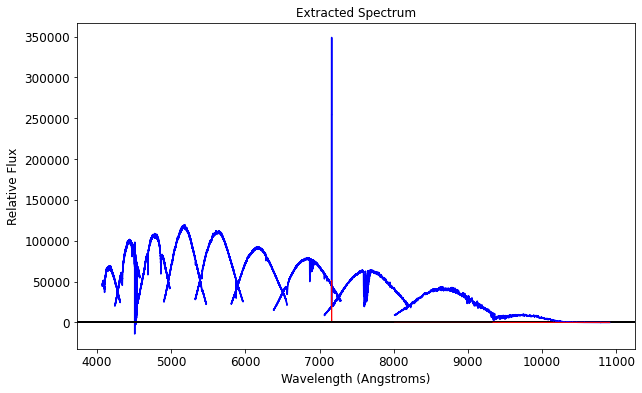

In [3]:
fg_spec.plot_all(fig=plt.figure(figsize=(10, 6)), ax=plt.subplot(111))

<IPython.core.display.Javascript object>


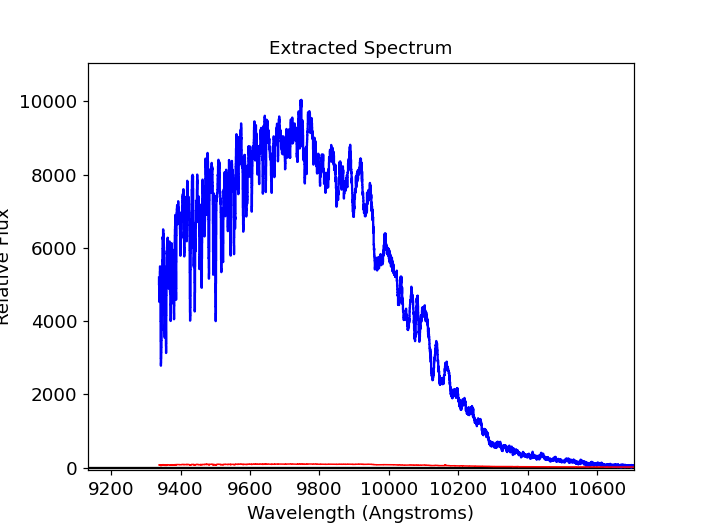

In [28]:
%matplotlib notebook
fg_spec[9].plot()

In [ ]:
wav_range = [[(4090.55, 4127.02, 15, 25)], [(4331.8, 4363.7, 40), (4466.80, 4479.28, 40, 20), 
              (4500.8, 4543.0, 20, 25)], [(4672.1, 4696.6, 30), (4844.7, 4880.7, 40)], 
             [(5322.1, 5337.7, 20), (5398.0, 5425.0, 20)], [(5396, 5424, 25), (5866.5, 5904.6, 20)],
             [(5867.0, 5904.0, 25), (6266.0, 6330.7, 25)], [(6529.0, 6599.0, 25), (6847.0, 6991.0, 50),
              (7056.0, 7076.3, 15), (7095.0, 7111.3, 15), (7163.4, 7282.6, 40, 2)],
             [(7158.0, 7168.0, 25), (7571.4, 7720.0, 50)], [(8198.0, 8242.0, 20), (8492.0, 9183.0, 200,15),
               (9264.0, 9361.0, 100, 0)], [(9330.0, 9784.0, 0, 50), (9784.0, 10190.0, 100)]]

In [7]:
fg_spec[0]['wav'][:100]

4071.4583834897303
4071.613071938004
4071.767766263414
4071.92246646618
4072.077172546533
4072.231884504692
4072.3866023408805
4072.5413260553223
4072.696055648236
4072.850791119853
4073.0055324703935


In [22]:
fg = echelle1d.Ech1d('spec1d_mdfit_feige110_esi_26.fits')

Opening echelle spectrum file: spec1d_mdfit_feige110_esi_26.fits

Ord N_pix lam_start lam_end  dispave
--- ----- --------- -------- -------
  0  1500   4071.46  4310.06   0.16
  1  2000   4240.70  4575.32   0.17
  2  2400   4546.04  4979.85   0.18
  3  2896   4902.88  5472.92   0.20
  4  2996   5325.24  5967.01   0.21
  5  3196   5810.63  6560.55   0.23
  6  3496   6380.37  7286.41   0.26
  7  3896   7066.66  8193.74   0.29
  8  4096   8012.11  9360.83   0.33
  9  4096   9337.74 10909.62   0.38


<IPython.core.display.Javascript object>


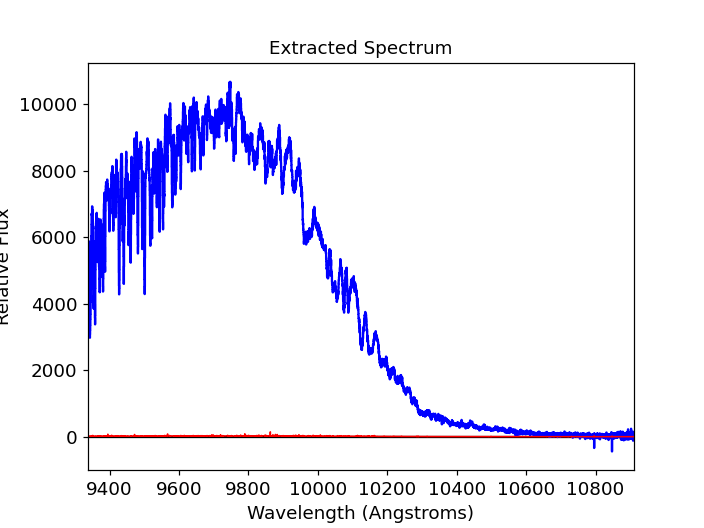

In [24]:
fg[9].plot()